In [43]:
#8.3 Project Presentations for WASHSTL201809DATA3 by Group H - Cody Braun, Austen Manser and Bill Nash

import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import numpy as np


DF_1960 = pd.read_csv("../Resources/Features_Billboard_1960s.csv")
DF_1970 = pd.read_csv("../Resources/Features_Billboard_1970s.csv")
DF_1980 = pd.read_csv("../Resources/Features_Billboard_1980s.csv")
DF_1990 = pd.read_csv("../Resources/Features_Billboard_1990s.csv")
DF_2000 = pd.read_csv("../Resources/Features_Billboard_2000s.csv")
DF_2010 = pd.read_csv("../Resources/Features_Billboard_2010s.csv")

Other_df = pd.read_csv("../Resources/Top100Not1.csv")

Decades_df = pd.read_csv("../Resources/Top100Not1_withDecade.csv")



In [44]:
# Drop NaN values in each DF

DF_1960_clean = DF_1960.dropna()
DF_1970_clean = DF_1970.dropna()
DF_1980_clean = DF_1980.dropna()
DF_1990_clean = DF_1990.dropna()
DF_2000_clean = DF_2000.dropna()
DF_2010_clean = DF_2010.dropna()



In [45]:
# Combine all the dataframes

frames = [DF_1960_clean, DF_1970_clean, DF_1980_clean, DF_1990_clean, DF_2000_clean, DF_2010_clean]

Billboard_df = pd.concat(frames)

Billboard_df.head()



,Artist,Song,WeeksAtNumberOne,Song ID,Song Popularity,Acousticness,Danceability,Energy,Liveness,Speechiness,Valence,Tempo,Instrumentalness,Loudness
0,The Rolling Stones,"""(I Can't Get No) Satisfaction""",4,6x7XTxs6pE1OuimqK7JJ7p,34.0,0.0161,0.343,0.974,0.3570,0.0952,0.324,131.177,0.575000,-4.113
1,Otis Redding,"""(Sittin' On) The Dock of the Bay""",4,5iJ82Q8TgyA0i5WGdgnL0A,4.0,0.1400,0.510,0.724,0.1520,0.0328,0.598,105.002,0.879000,-8.367
2,The Righteous Brothers,"""(You're My) Soul And Inspiration""",3,1Mcoepzm9uZ3nayQLy1O7E,0.0,0.3310,0.527,0.566,0.0988,0.0272,0.366,92.070,0.000002,-6.427
3,? & the Mysterians,"""96 Tears""",1,2OFLNihLjoH4pubiYMf4xu,17.0,0.5200,0.608,0.701,0.2130,0.0523,0.898,71.785,0.000253,-8.016
4,Elvis Presley,"""A Big Hunk o' Love""",2,4OXR5PiY95zKeXVLfTUpXD,9.0,0.6480,0.558,0.841,0.2600,0.0478,0.951,87.026,0.470000,-10.891


In [46]:

# Other_df.head()

Other_df.describe()

,Peak_Position,Song Popularity,Acousticness,Danceability,Energy,Liveness,Speechiness,Valence,Tempo,Instrumentalness,Loudness
count,20040.000000,20040.000000,20040.000000,20040.000000,20040.000000,20040.000000,20040.000000,20040.000000,20040.000000,20040.000000,20040.000000
mean,45.072255,6.373752,0.309070,0.593821,0.562723,0.209906,0.061207,0.587448,120.951777,0.200344,-10.309714
std,29.383495,10.200492,0.306514,0.153644,0.212824,0.196502,0.073772,0.251755,28.416612,0.333927,3.961724
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000
25%,18.000000,0.000000,0.030500,0.495000,0.408000,0.092300,0.031200,0.387750,100.017750,0.000001,-12.557500
50%,43.000000,2.000000,0.197000,0.606000,0.564000,0.131000,0.038400,0.610000,119.924000,0.000472,-9.940500
75%,70.000000,9.000000,0.558000,0.703000,0.724000,0.260000,0.055800,0.802000,136.781750,0.293000,-7.548000
max,99.000000,88.000000,0.996000,0.981000,0.998000,1.000000,0.962000,1.000000,246.385000,0.996000,2.711000


In [47]:

# Filter by decade

other_1950_df = Decades_df.loc[Decades_df['Year'] == 1950, :]
other_1960_df = Decades_df.loc[Decades_df['Year'] == 1960, :]
other_1970_df = Decades_df.loc[Decades_df['Year'] == 1970, :]
other_1980_df = Decades_df.loc[Decades_df['Year'] == 1980, :]
other_1990_df = Decades_df.loc[Decades_df['Year'] == 1990, :]
other_2000_df = Decades_df.loc[Decades_df['Year'] == 2000, :]
other_2010_df = Decades_df.loc[Decades_df['Year'] == 2010, :]

# Combine 1950 and 1960s
list1 = [other_1950_df, other_1960_df]

other_1960_df = pd.concat(list1)


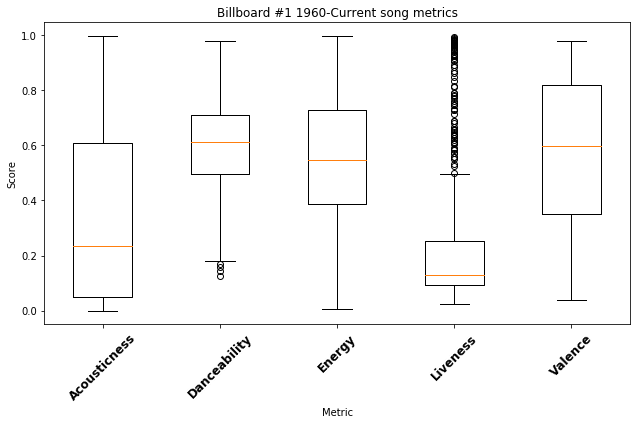

In [48]:
%matplotlib inline

# Full Billboard Boxplot

billbord_data = [Billboard_df['Acousticness'], Billboard_df['Danceability'], Billboard_df['Energy'], Billboard_df['Liveness'],
       Billboard_df['Valence']]

billbord_data2 = [Billboard_df['Speechiness'], Billboard_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']
labels2 = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Valence',]


fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(billbord_data)
ax.set_xticklabels(labels2, rotation=45, fontsize=12, fontweight="bold")


plt.title("Billboard #1 1960-Current song metrics")
plt.xlabel("Metric")
plt.ylabel("Score")

plt.tight_layout()
plt.savefig('../Images/Billboard_1_metrics1.png')

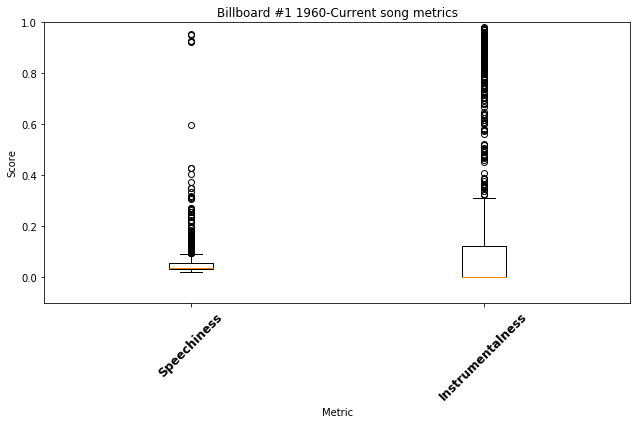

In [49]:
# Full Billboard Boxplot

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(billbord_data2)
ax.set_xticklabels(['Speechiness', 'Instrumentalness'], rotation=45, fontsize=12, fontweight="bold")

plt.title("Billboard #1 1960-Current song metrics")
plt.ylim(-0.1,1)

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_1_metrics2.png')

count    857.000000
mean       0.060571
std        0.086537
min        0.021500
25%        0.031100
50%        0.037300
75%        0.056000
max        0.954000
Name: Speechiness, dtype: float64

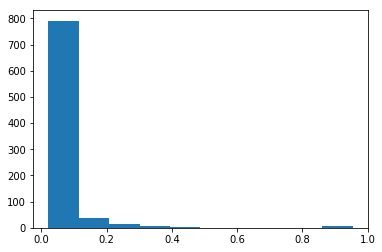

In [50]:
# Billboard #1 Speechiness Histogram

plt.hist(billbord_data2[0])

billbord_data2[0].describe()

count    857.000000
mean       0.179192
std        0.325340
min        0.000000
25%        0.000000
50%        0.000236
75%        0.125000
max        0.982000
Name: Instrumentalness, dtype: float64

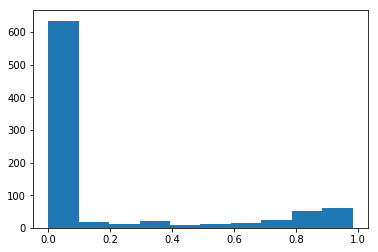

In [51]:
# Billboard #1 Instrumentalness Histogram

plt.hist(billbord_data2[1])

billbord_data2[1].describe()

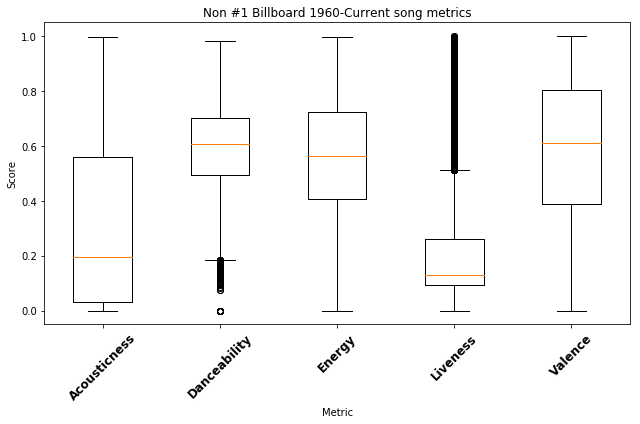

In [52]:


# Other Billboard Boxplot

other_billbord_data = [Other_df['Acousticness'], Other_df['Danceability'], Other_df['Energy'], Other_df['Liveness'],
       Other_df['Valence']]

other_billbord_data2 = [Other_df['Speechiness'], Other_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_billbord_data)
ax.set_xticklabels(labels2, rotation=45, fontsize=12, fontweight="bold")

plt.title("Non #1 Billboard 1960-Current song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_non1_metrics1.png')

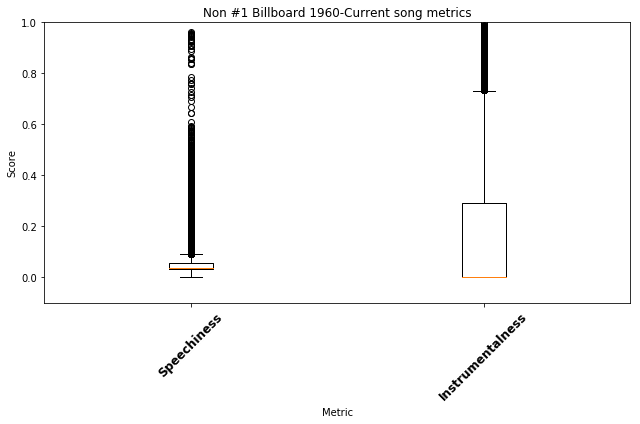

In [53]:

# Other Billboard Boxplot

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_billbord_data2)
ax.set_xticklabels(['Speechiness', 'Instrumentalness'], rotation=45, fontsize=12, fontweight="bold")

plt.title("Non #1 Billboard 1960-Current song metrics")
plt.ylim(-0.1,1)

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_non1_metrics2.png')

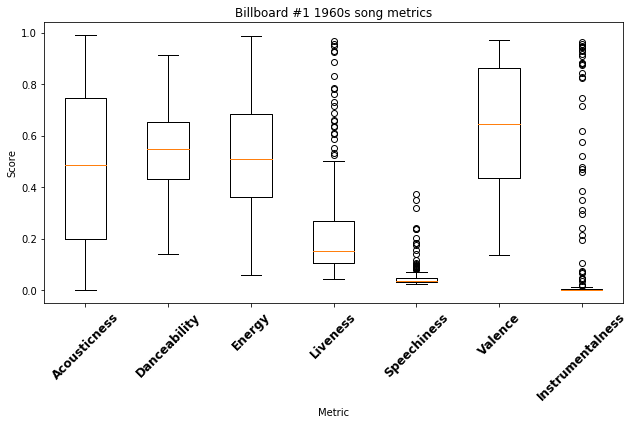

In [54]:
# 1960s Boxplot

data1960 = [DF_1960_clean['Acousticness'], DF_1960_clean['Danceability'], DF_1960_clean['Energy'], DF_1960_clean['Liveness'],
       DF_1960_clean['Speechiness'], DF_1960_clean['Valence'], DF_1960_clean['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data1960)
ax.set_xticklabels(labels, rotation=45, fontsize=12, fontweight="bold")

plt.title("Billboard #1 1960s song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_1_1960metrics.png')

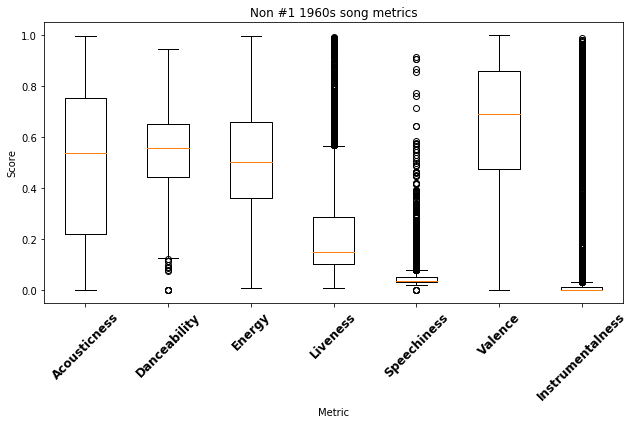

In [55]:
# 1960s non #1 Boxplot

other_1960_data = [other_1960_df['Acousticness'], other_1960_df['Danceability'], other_1960_df['Energy'], 
                   other_1960_df['Liveness'],other_1960_df['Speechiness'], other_1960_df['Valence'],
                   other_1960_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_1960_data)
ax.set_xticklabels(labels, rotation=45, fontsize=12, fontweight="bold")

plt.title("Non #1 1960s song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_non_1_1960metrics.png')

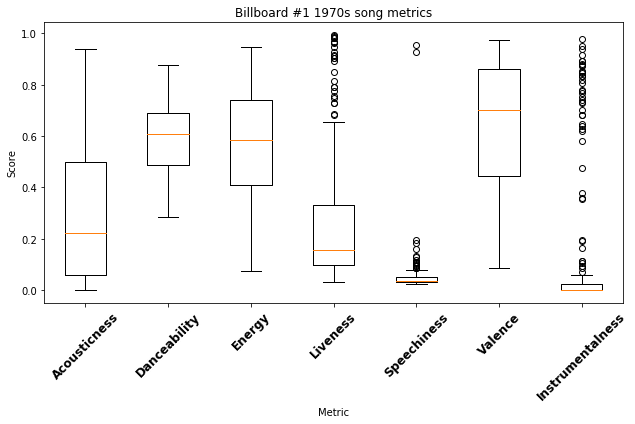

In [56]:
# 1970s Boxplot

data1970 = [DF_1970_clean['Acousticness'], DF_1970_clean['Danceability'], DF_1970_clean['Energy'], DF_1970_clean['Liveness'],
       DF_1970_clean['Speechiness'], DF_1970_clean['Valence'], DF_1970_clean['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data1970)
ax.set_xticklabels(labels, rotation=45, fontsize=12, fontweight="bold")

plt.title("Billboard #1 1970s song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_1_1970metrics.png')

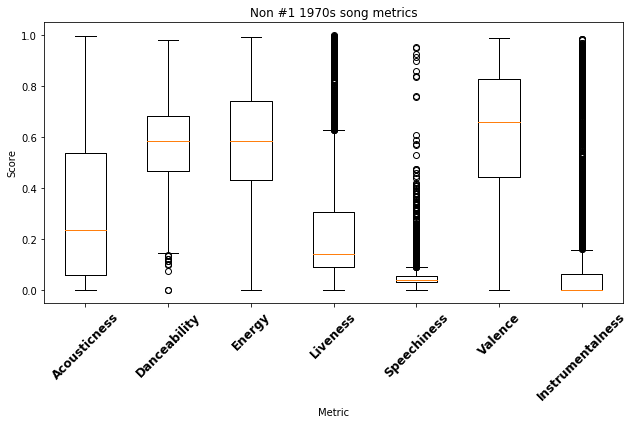

In [57]:
# 1970s non #1 Boxplot

other_1970_data = [other_1970_df['Acousticness'], other_1970_df['Danceability'], other_1970_df['Energy'],
                   other_1970_df['Liveness'],other_1970_df['Speechiness'], other_1970_df['Valence'],
                   other_1970_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_1970_data)
ax.set_xticklabels(labels, rotation=45, fontsize=12, fontweight="bold")

plt.title("Non #1 1970s song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_non_1_1970metrics.png')


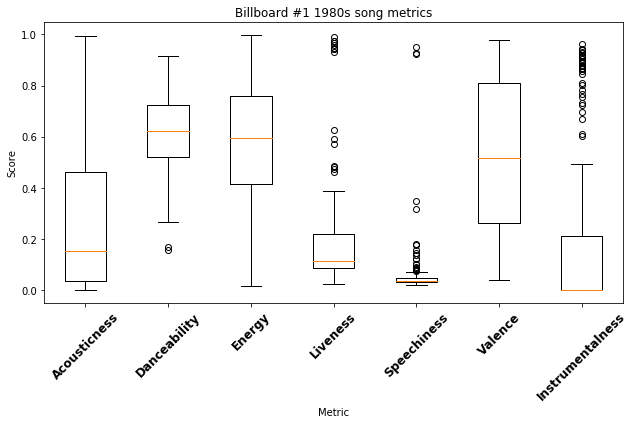

In [58]:
# 1980s Boxplot

data1980 = [DF_1980_clean['Acousticness'], DF_1980_clean['Danceability'], DF_1980_clean['Energy'], DF_1980_clean['Liveness'],
       DF_1980_clean['Speechiness'], DF_1980_clean['Valence'], DF_1980_clean['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data1980)
ax.set_xticklabels(labels, rotation=45, fontsize=12, fontweight="bold")

plt.title("Billboard #1 1980s song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_1_1980metrics.png')


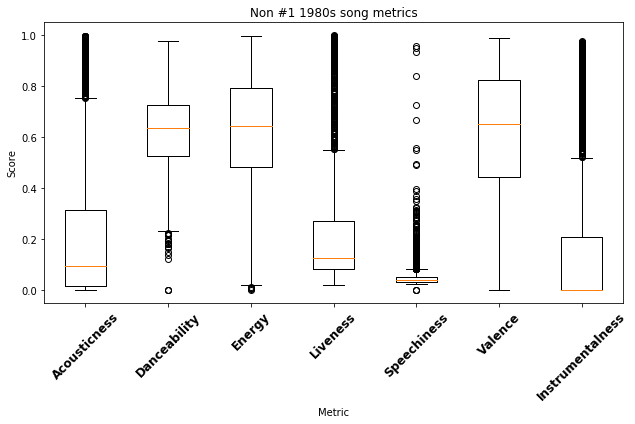

In [59]:
# 1980s non #1 Boxplot

other_1980_data = [other_1980_df['Acousticness'], other_1980_df['Danceability'], other_1980_df['Energy'],
                   other_1980_df['Liveness'],other_1980_df['Speechiness'], other_1980_df['Valence'],
                   other_1980_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_1980_data)
ax.set_xticklabels(labels, rotation=45, fontsize=12, fontweight="bold")

plt.title("Non #1 1980s song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_non_1_1980metrics.png')

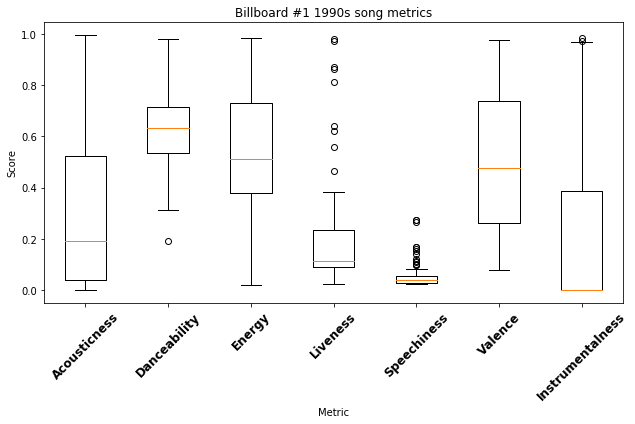

In [60]:
# 1990s Boxplot

data1990 = [DF_1990_clean['Acousticness'], DF_1990_clean['Danceability'], DF_1990_clean['Energy'], DF_1990_clean['Liveness'],
       DF_1990_clean['Speechiness'], DF_1990_clean['Valence'], DF_1990_clean['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data1990)
ax.set_xticklabels(labels, rotation=45, fontsize=12, fontweight="bold")

plt.title("Billboard #1 1990s song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_1_1990metrics.png')

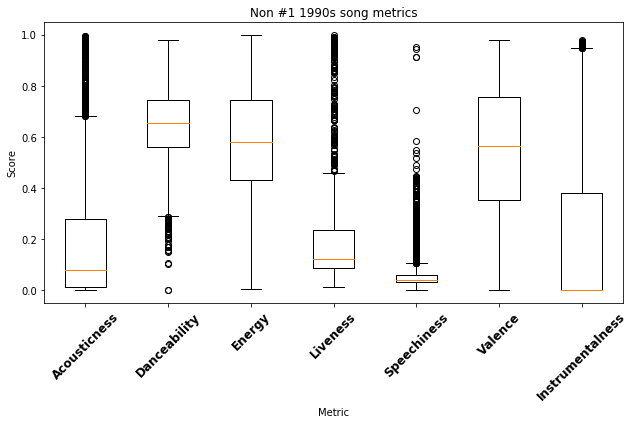

In [61]:
# 1990s non #1 Boxplot

other_1990_data = [other_1990_df['Acousticness'], other_1990_df['Danceability'], other_1990_df['Energy'], 
                   other_1990_df['Liveness'], other_1990_df['Speechiness'], other_1990_df['Valence'], 
                   other_1990_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_1990_data)
ax.set_xticklabels(labels, rotation=45, fontsize=12, fontweight="bold")

plt.title("Non #1 1990s song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_non_1_1990metrics.png')

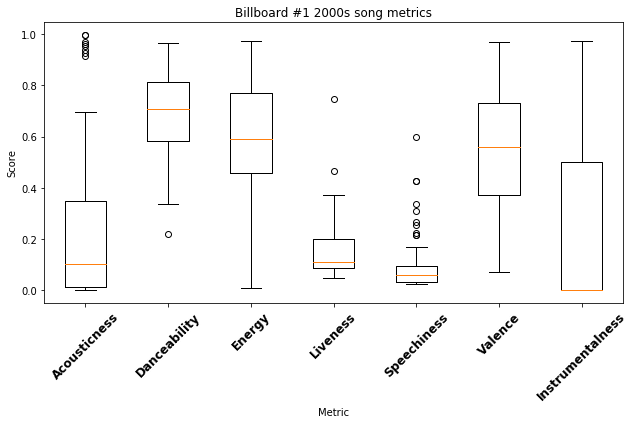

In [62]:
# 2000s Boxplot

data2000 = [DF_2000_clean['Acousticness'], DF_2000_clean['Danceability'], DF_2000_clean['Energy'], DF_2000_clean['Liveness'],
       DF_2000_clean['Speechiness'], DF_2000_clean['Valence'], DF_2000_clean['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data2000)
ax.set_xticklabels(labels, rotation=45, fontsize=12, fontweight="bold")

plt.title("Billboard #1 2000s song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_1_2000metrics.png')

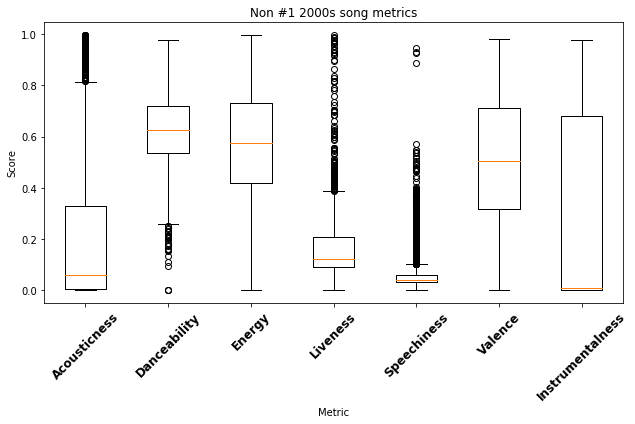

In [63]:
# 2000s non #1 Boxplot

other_2000_data = [other_2000_df['Acousticness'], other_2000_df['Danceability'], other_2000_df['Energy'],
                   other_2000_df['Liveness'],other_2000_df['Speechiness'], other_2000_df['Valence'],
                   other_2000_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_2000_data)
ax.set_xticklabels(labels, rotation=45, fontsize=12, fontweight="bold")

plt.title("Non #1 2000s song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_non_1_2000metrics.png')

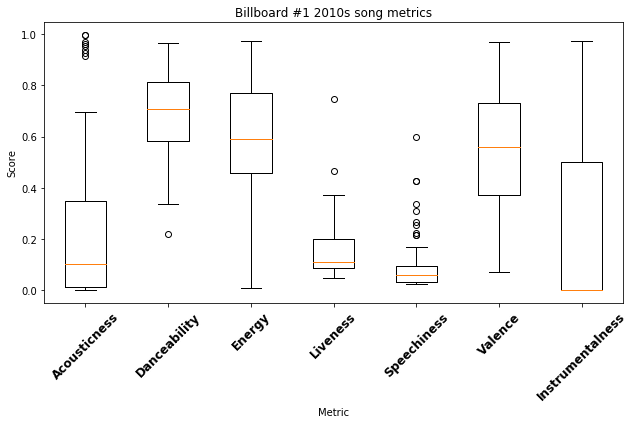

In [64]:
# 2010s Boxplot

data2010 = [DF_2010_clean['Acousticness'], DF_2010_clean['Danceability'], DF_2010_clean['Energy'], DF_2010_clean['Liveness'],
       DF_2010_clean['Speechiness'], DF_2010_clean['Valence'], DF_2010_clean['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data2000)
ax.set_xticklabels(labels, rotation=45, fontsize=12, fontweight="bold")

plt.title("Billboard #1 2010s song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_1_2010metrics.png')

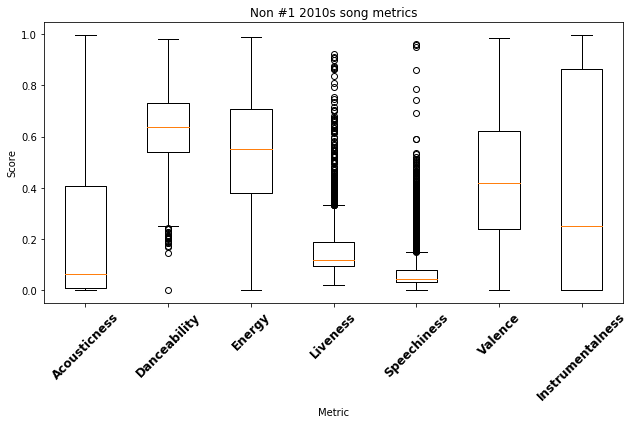

In [65]:
# 2010s non #1 Boxplot

other_2010_data = [other_2010_df['Acousticness'], other_2010_df['Danceability'], other_2010_df['Energy'], other_2010_df['Liveness'],
       other_2010_df['Speechiness'], other_2010_df['Valence'], other_2010_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_2010_data)
ax.set_xticklabels(labels, rotation=45, fontsize=12, fontweight="bold")

plt.title("Non #1 2010s song metrics")

plt.xlabel("Metric")
plt.ylabel("Score")
plt.tight_layout()

plt.savefig('../Images/Billboard_non_1_2010metrics.png')


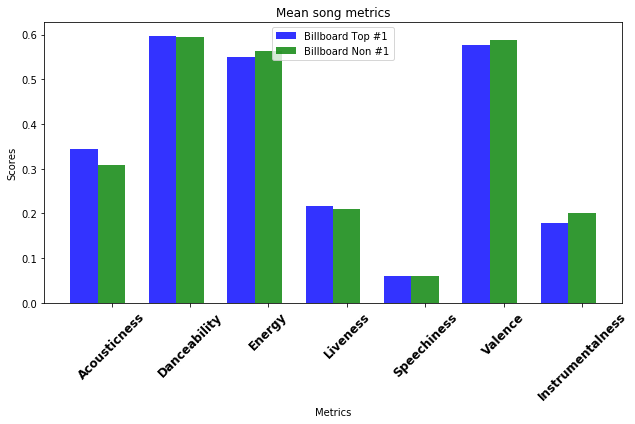

In [66]:


billbord_data_mean = [Billboard_df['Acousticness'].mean(), Billboard_df['Danceability'].mean(), Billboard_df['Energy'].mean(),
                      Billboard_df['Liveness'].mean(), Billboard_df['Speechiness'].mean(), Billboard_df['Valence'].mean(),
                      Billboard_df['Instrumentalness'].mean()]

other_billbord_data_mean = [Other_df['Acousticness'].mean(), Other_df['Danceability'].mean(), Other_df['Energy'].mean(),
                      Other_df['Liveness'].mean(), Other_df['Speechiness'].mean(), Other_df['Valence'].mean(),
                      Other_df['Instrumentalness'].mean()]





fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
index = np.arange(7)
bar_width = 0.35
opacity = 0.8
 
bar1 = plt.bar(index, billbord_data_mean, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Billboard Top #1')
 
bar2 = plt.bar(index + bar_width, other_billbord_data_mean, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Billboard Non #1')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Mean song metrics')
plt.xticks(index + bar_width, labels, rotation=45, fontsize=12, fontweight="bold")
plt.legend(loc=9)
plt.tight_layout()


plt.savefig('../Images/Billboard_1_vs_non1_bar.png')

In [67]:
import scipy.stats as stats

group1 = Billboard_df['Acousticness']

group2 = Other_df['Acousticness']


test1 = stats.ttest_ind(group1, group2, equal_var=False)

test1

Ttest_indResult(statistic=3.1636387976622844, pvalue=0.0016089135735182477)

In [68]:
group1 = Billboard_df['Danceability']

group2 = Other_df['Danceability']


test2 = stats.ttest_ind(group1, group2, equal_var=False)

test2

Ttest_indResult(statistic=0.70906124375065926, pvalue=0.47846401720837139)

In [69]:
group1 = Billboard_df['Energy']

group2 = Other_df['Energy']


test3 = stats.ttest_ind(group1, group2, equal_var=False)

test3

Ttest_indResult(statistic=-1.4876159261830919, pvalue=0.13719441615137357)

In [70]:

group1 = Billboard_df['Liveness']

group2 = Other_df['Liveness']


test4 = stats.ttest_ind(group1, group2, equal_var=False)

test4

Ttest_indResult(statistic=0.78231219754925996, pvalue=0.43423242099903891)

In [71]:

group1 = Billboard_df['Speechiness']

group2 = Other_df['Speechiness']


test5 = stats.ttest_ind(group1, group2, equal_var=False)

test5

Ttest_indResult(statistic=-0.21212544286484961, pvalue=0.83205667323214427)

In [72]:

group1 = Billboard_df['Valence']

group2 = Other_df['Valence']


test6 = stats.ttest_ind(group1, group2, equal_var=False)

test6

Ttest_indResult(statistic=-1.0647448715813204, pvalue=0.28726991827018739)

In [73]:

group1 = Billboard_df['Instrumentalness']

group2 = Other_df['Instrumentalness']


test7 = stats.ttest_ind(group1, group2, equal_var=False)

test7

Ttest_indResult(statistic=-1.8618351906316613, pvalue=0.062939965461291797)

In [75]:
p_vals = [test1[1], test2[1], test3[1], test4[1], test5[1], test6[1], test7[1]]

Billboard_1_means = [Billboard_df['Acousticness'].mean(), Billboard_df['Danceability'].mean(), Billboard_df['Energy'].mean(),
                    Billboard_df['Liveness'].mean(), Billboard_df['Speechiness'].mean(), Billboard_df['Valence'].mean(),
                    Billboard_df['Instrumentalness'].mean()]

Billboard_non_1_means = [Other_df['Acousticness'].mean(), Other_df['Danceability'].mean(), Other_df['Energy'].mean(),
                    Other_df['Liveness'].mean(), Other_df['Speechiness'].mean(), Other_df['Valence'].mean(),
                    Other_df['Instrumentalness'].mean()]

metrics_df = pd.DataFrame({'Billboard #1 Mean': Billboard_1_means,
                          'Billboard Non #1 Mean': Billboard_non_1_means,
                          '#1 vs Non #1 p-value': p_vals}, index=labels)

metrics_df

,#1 vs Non #1 p-value,Billboard #1 Mean,Billboard Non #1 Mean
Acousticness,0.001609,0.344021,0.309070
Danceability,0.478464,0.597617,0.593821
Energy,0.137194,0.550947,0.562723
Liveness,0.434232,0.215674,0.209906
Speechiness,0.832057,0.060571,0.061207
Valence,0.287270,0.577590,0.587448
Instrumentalness,0.062940,0.179192,0.200344


In [81]:
columns = ["60's","70's","80's","90's","00's","10's"]
index = ["Acousticness","Danceability","Energy","Liveness","Speechiness","Valence","Instrumentalness"]
decades_metrics_df = pd.DataFrame(index=index,columns=columns)
decades_metrics_df

,60's,70's,80's,90's,00's,10's
Acousticness,NaN,NaN,NaN,NaN,NaN,NaN
Danceability,NaN,NaN,NaN,NaN,NaN,NaN
Energy,NaN,NaN,NaN,NaN,NaN,NaN
Liveness,NaN,NaN,NaN,NaN,NaN,NaN
Speechiness,NaN,NaN,NaN,NaN,NaN,NaN
Valence,NaN,NaN,NaN,NaN,NaN,NaN
Instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
tests_1960 = []
for x in range(7):
    tests_1960.append(stats.ttest_ind(data1960[x], other_1960_data[x], equal_var=False)[1])
decades_metrics_df["60's"] = tests_1960
    
tests_1970 = []
for x in range(7):
    tests_1970.append(stats.ttest_ind(data1970[x], other_1970_data[x], equal_var=False)[1])
decades_metrics_df["70's"] = tests_1970

tests_1980 = []
for x in range(7):
    tests_1980.append(stats.ttest_ind(data1980[x], other_1980_data[x], equal_var=False)[1])
decades_metrics_df["80's"] = tests_1980

tests_1990 = []
for x in range(7):
    tests_1990.append(stats.ttest_ind(data1990[x], other_1990_data[x], equal_var=False)[1])
decades_metrics_df["90's"] = tests_1990

tests_2000 = []
for x in range(7):
    tests_2000.append(stats.ttest_ind(data2000[x], other_2000_data[x], equal_var=False)[1])
decades_metrics_df["00's"] = tests_2000

tests_2010 = []
for x in range(7):
    tests_2010.append(stats.ttest_ind(data2010[x], other_2010_data[x], equal_var=False)[1])
decades_metrics_df["10's"] = tests_2010

In [85]:
def color_significant_red(val):
    color = 'red' if val < 0.05 else 'black'
    return 'color: %s' % color
    
colored_decades_results = decades_metrics_df.style.applymap(color_significant_red)
colored_decades_results

,60's,70's,80's,90's,00's,10's
Acousticness,0.310069,0.920159,0.000837003,0.000699714,0.171797,0.00024157
Danceability,0.739251,0.0158887,0.19218,0.124092,0.000341065,0.622823
Energy,0.659128,0.864357,0.00697859,0.0464606,0.647707,0.0183061
Liveness,0.510145,0.224783,0.0558999,0.656583,0.449713,0.425993
Speechiness,0.866073,0.578192,0.22183,0.00248275,0.0350553,0.637604
Valence,0.262533,0.243618,3.62946e-05,0.10627,0.138446,0.984271
Instrumentalness,0.407726,0.860039,0.854674,0.981114,0.331303,0.422296
